# Assignment-1 Data Preparation

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. Load dataset

In [64]:
dataset = pd.read_csv("House_Price_dataset.csv")
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished
541,1767150,2400,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000,3620,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,1750000,2910,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished


# 2. Find the shape of data

In [65]:
dataset.shape

(545, 13)

# 3. Find the summary of data

In [66]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,540.000000,540.000000,543.000000,541.000000
mean,4.766729e+06,5150.541284,2.961111,1.285185,1.804788,0.691312
std,1.870440e+06,2170.141023,0.738779,0.502464,0.869011,0.860070
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# 4. Find the data type of each column

In [67]:
dataset.dtypes

price                 int64
area                  int64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking             float64
prefarea             object
furnishingstatus     object
dtype: object

# 5. Find Missing Values

In [68]:
dataset.isna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [69]:
dataset.isna().sum()

price               0
area                0
bedrooms            5
bathrooms           5
stories             2
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             4
prefarea            0
furnishingstatus    0
dtype: int64

# 6. Finding out Zero's

In [85]:
(dataset==0).sum()

price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom             0
basement              0
hotwaterheating       0
airconditioning       0
parking             297
prefarea              0
furnishingstatus      0
dtype: int64

# 7. Find Mean

In [73]:
numerical_dataset = ["Price", "Area", "Bedrooms", "Bathrooms", "Stories", "Parking"]
for data in numerical_dataset:
    print(f"{data} = {np.mean(dataset[data.lower()])}")

Price = 4766729.247706422
Area = 5150.54128440367
Bedrooms = 2.9611111111111112
Bathrooms = 1.2851851851851852
Stories = 1.8047882136279927
Parking = 0.6913123844731978


# 8. Replace the missing values

In [74]:
dataset.isna().sum()

price               0
area                0
bedrooms            5
bathrooms           5
stories             2
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             4
prefarea            0
furnishingstatus    0
dtype: int64

In [75]:
missing_values = ["bedrooms", "bathrooms", "stories", "parking"]
for label, content in dataset.items():
    if pd.isnull(content).sum():
            dataset[label] = content.fillna(content.mean())

In [76]:
dataset.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# 9. Draw the pair plot

A pair plot, also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset

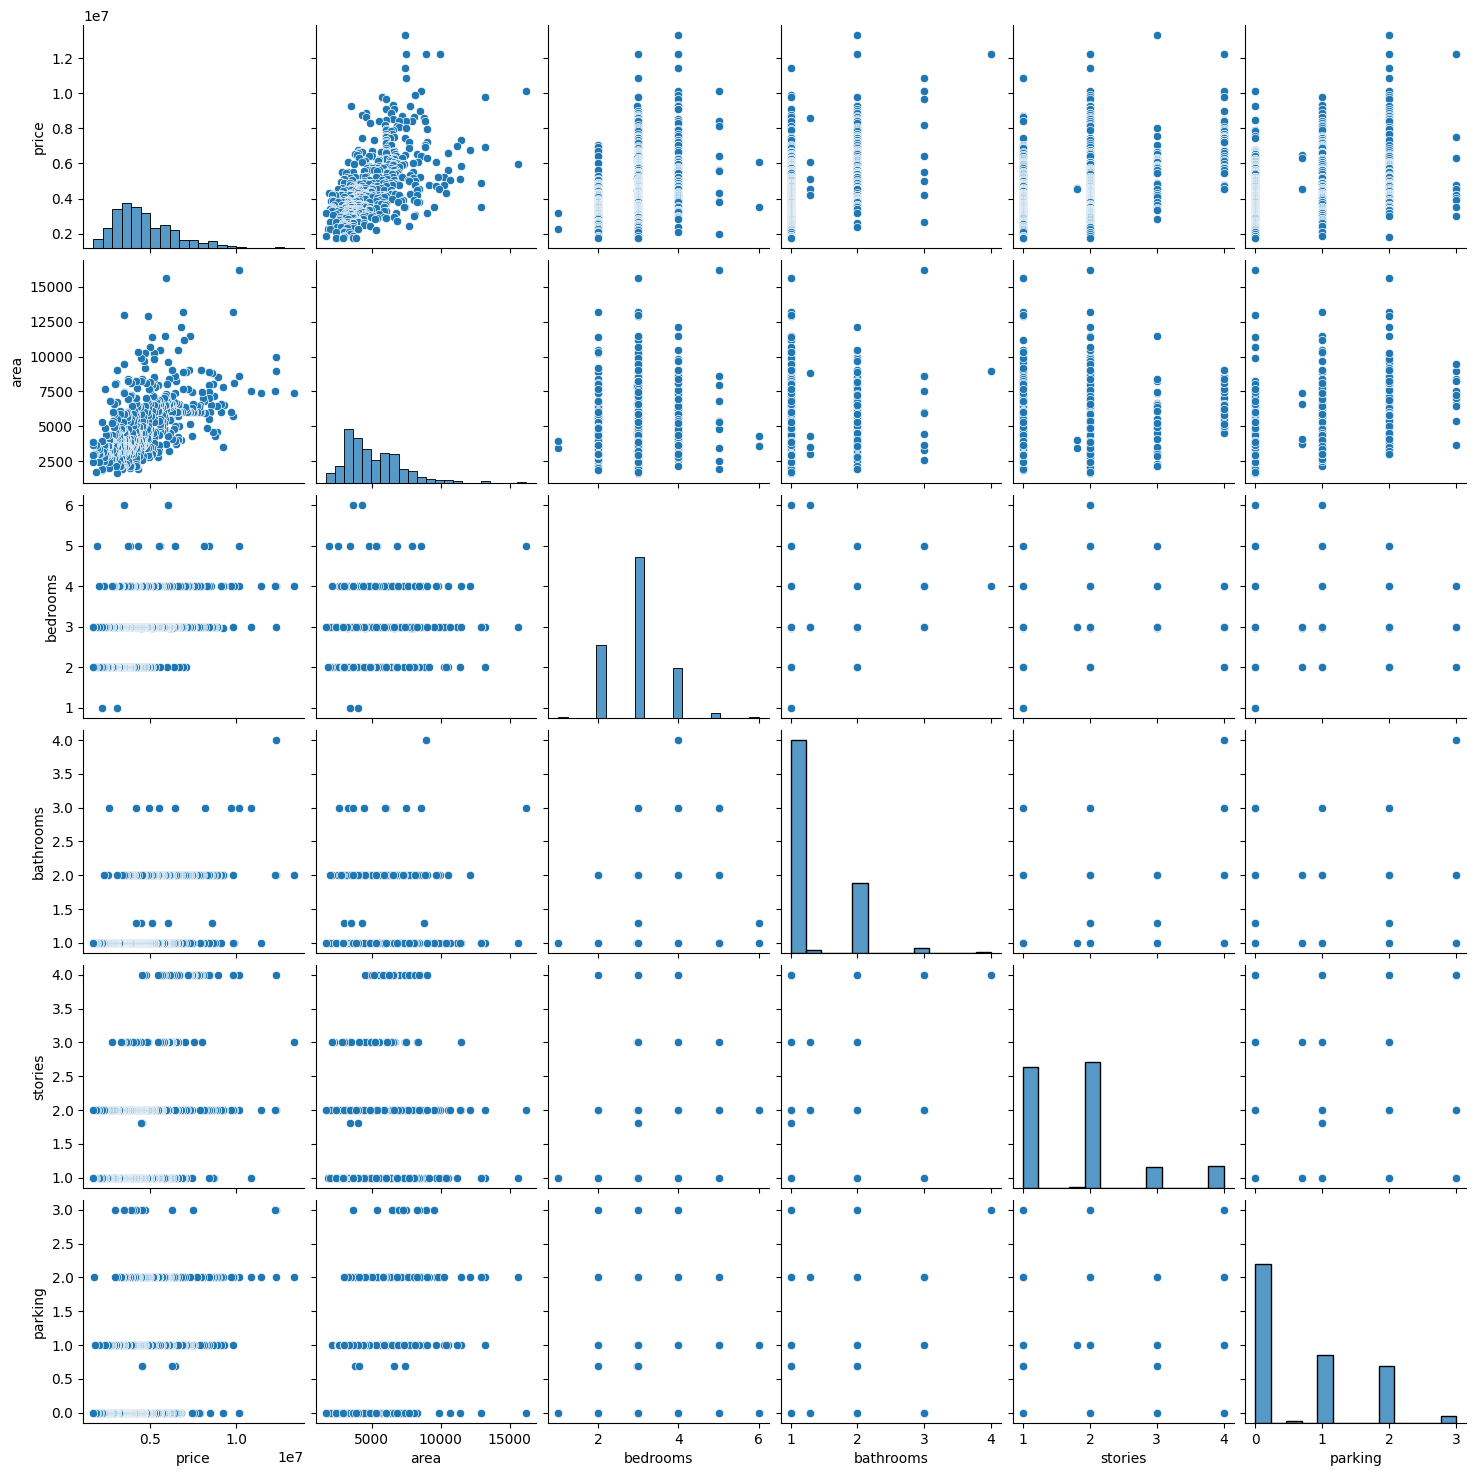

In [77]:
sns.pairplot(dataset)

# 10. Divide the dataset into training (75%) and testing (25%).

In [78]:
X = dataset.drop("price", axis=1)
y = dataset["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

len(X_train), len(X_test)

(408, 137)

# 11. Create subsets as per the given instructions

## 1. Create the subset with all the columns and first 100 rows

In [79]:
first_100 = dataset[:100]
first_100

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.000000,2.0,3.0,yes,no,no,no,yes,2.000000,yes,furnished
1,12250000,8960,4.000000,4.0,4.0,yes,no,no,no,yes,3.000000,no,furnished
2,12250000,9960,3.000000,2.0,2.0,yes,no,yes,no,no,2.000000,yes,semi-furnished
3,12215000,7500,4.000000,2.0,2.0,yes,no,yes,no,yes,3.000000,yes,furnished
4,11410000,7420,4.000000,1.0,2.0,yes,yes,yes,no,yes,2.000000,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6300000,4100,3.000000,2.0,3.0,yes,no,no,no,yes,2.000000,no,semi-furnished
96,6300000,9000,3.000000,1.0,1.0,yes,no,yes,no,no,1.000000,yes,furnished
97,6300000,6400,3.000000,1.0,1.0,yes,yes,yes,no,yes,1.000000,yes,semi-furnished
98,6293000,6600,2.961111,2.0,3.0,yes,no,no,no,yes,0.691312,yes,unfurnished


## 2. Create the subset with all the rows and columns where status is furnished

In [80]:
furnished = dataset[dataset["furnishingstatus"] == "furnished"]
furnished

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
8,9870000,8100,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,yes,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,2590000,3600,2.0,2.0,2.0,yes,no,yes,no,no,1.0,no,furnished
512,2520000,3000,2.0,1.0,2.0,yes,no,no,no,no,0.0,no,furnished
522,2380000,2475,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,furnished
523,2380000,2787,4.0,2.0,2.0,yes,no,no,no,no,0.0,no,furnished


## 3. Create the subset with only five important columns and all rows

In [81]:
imp_data = pd.DataFrame(dataset, columns=["area", "guestroom", "parking", "furnishingstatus", "price"])
imp_data

,area,guestroom,parking,furnishingstatus,price
0,7420,no,2.0,furnished,13300000
1,8960,no,3.0,furnished,12250000
2,9960,no,2.0,semi-furnished,12250000
3,7500,no,3.0,furnished,12215000
4,7420,yes,2.0,furnished,11410000
...,...,...,...,...,...
540,3000,no,2.0,unfurnished,1820000
541,2400,no,0.0,semi-furnished,1767150
542,3620,no,0.0,unfurnished,1750000
543,2910,no,0.0,furnished,1750000


## 4. Create the subset with all the samples where area > 1000

In [82]:
area_greater_1000 = dataset[dataset["area"] > 1000]
area_greater_1000

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished
541,1767150,2400,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000,3620,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,1750000,2910,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished


## 5. Subset with the rows 10 to 150 with no guestroom and no of bathrooms >=2

In [83]:
temp_dataset = dataset[10:151]
subset = temp_dataset[(temp_dataset["guestroom"] == "no") & (temp_dataset["bathrooms"] >= 2)]
subset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
12,9310000,6550,4.000000,2.0,2.0,yes,no,no,no,yes,1.000000,yes,semi-furnished
13,9240000,3500,4.000000,2.0,2.0,yes,no,no,yes,no,2.000000,no,furnished
14,9240000,7800,2.961111,2.0,2.0,yes,no,no,no,no,0.000000,yes,semi-furnished
17,8960000,8500,3.000000,2.0,4.0,yes,no,no,no,yes,2.000000,no,furnished
19,8855000,6420,3.000000,2.0,2.0,yes,no,no,no,yes,1.000000,yes,semi-furnished
28,8400000,7950,5.000000,2.0,2.0,yes,no,yes,yes,no,2.000000,no,unfurnished
29,8400000,5500,4.000000,2.0,2.0,yes,no,yes,no,yes,1.000000,yes,semi-furnished
30,8400000,7475,3.000000,2.0,4.0,yes,no,no,no,yes,2.000000,no,unfurnished
32,8295000,4880,4.000000,2.0,2.0,yes,no,no,no,yes,1.000000,yes,furnished
35,8080940,7000,3.000000,2.0,4.0,yes,no,no,no,yes,2.000000,no,furnished
